# Ajinomoto Data Analysis Notebook

In this notebook we compile all assays performed for the Ajinomoto Project on *E. coli* strains that were designed to produce the C12 Fatty alcohol dodecanol. Two complete cycles of design build test learn [DBTL] were performed. This document is a reproducable record of all analyses that were performed on the data and the resulting conclusions.

In [1]:
import pandas as pd
from IPython.display import display

#Import data into pandas dataframe
df = pd.read_csv('data/EDD_Ajinomoto_Data.csv',header=[0, 1], index_col=0, skipinitialspace=False)

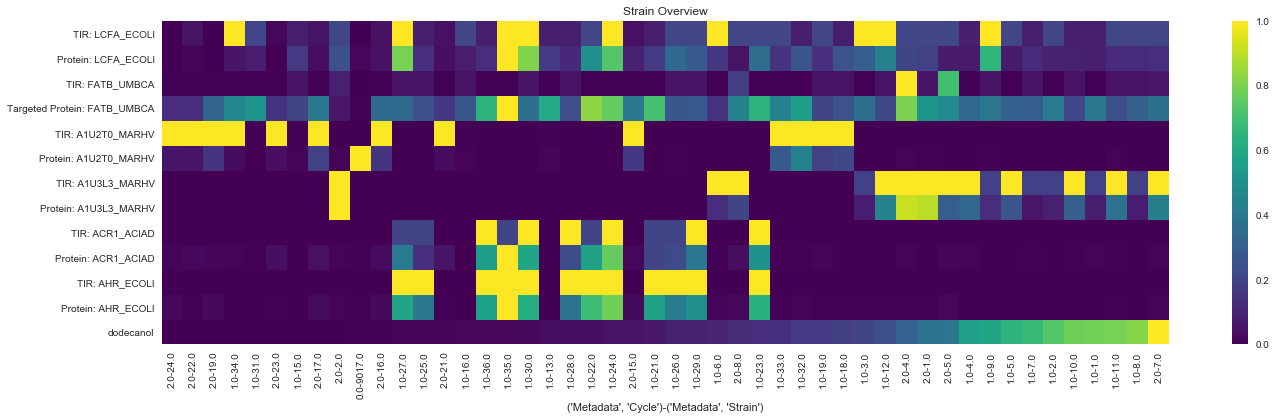

In [2]:
from plot import strain_heatmap
strain_heatmap(df)

### 1.1 Quality Checking and Data Cleaning

The data is cleaned and then measured for quality.

#### Proteomics Cleanup
We check to make sure protein is produced if and only if the associated gene is expressed. Some Protomics data suggests the presence of proteins in strains which were not present in the vectors. These protein counts are zeroed out to remove the spurious measurements if they are close to zero.

In [3]:
#Proteomics Clean-Up
from utility import clean_proteomics
df.loc[df[('Metadata','Cycle')]>0,df.columns.get_level_values(0)=='Targeted Proteomics'] = df.loc[df[('Metadata','Cycle')]>0].apply(clean_proteomics,axis=1).values

#### General Cleanup
Data points with a coefficient of variation over the threshold are removed. Optionally, everything below the given detection threshold is zeroed out for an assay.

In [4]:
#Clean Data 
from utility import clean_data
assay_types = ['GC-MS','LC-MS','HPLC','NIMS','Targeted Proteomics']
assay_df_slice = df.loc[:,df.columns.get_level_values(0).isin(assay_types+['Metadata'])]
df.loc[:,df.columns.get_level_values(0).isin(assay_types+['Metadata'])] = clean_data(assay_df_slice,CoV_threshold=0.3)

Now that the data is cleaned we can visualize the Coefficient of Variation of The measurements for each assay type.

/Users/zakcostello/Documents/ActiveProjects/Ajinomoto/plot.py:250: RuntimeWarning: divide by zero encountered in log10
  means = np.log10(mean_df[assay]).values.flatten()


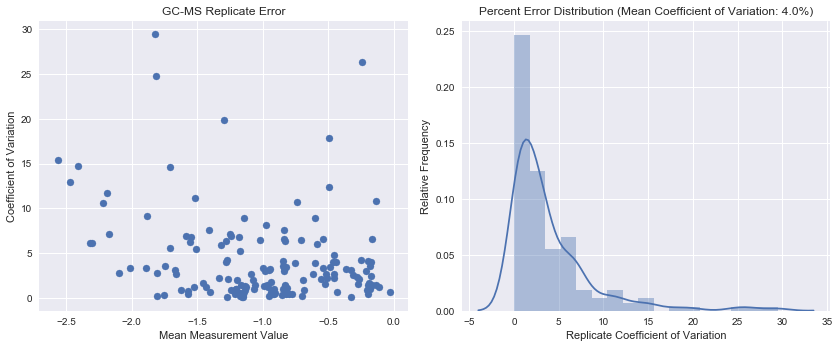

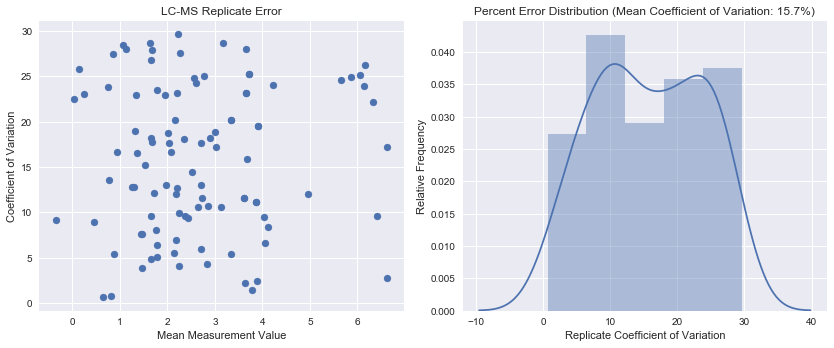

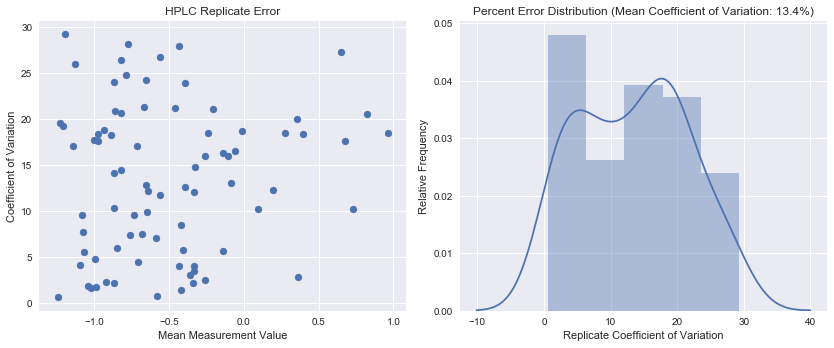

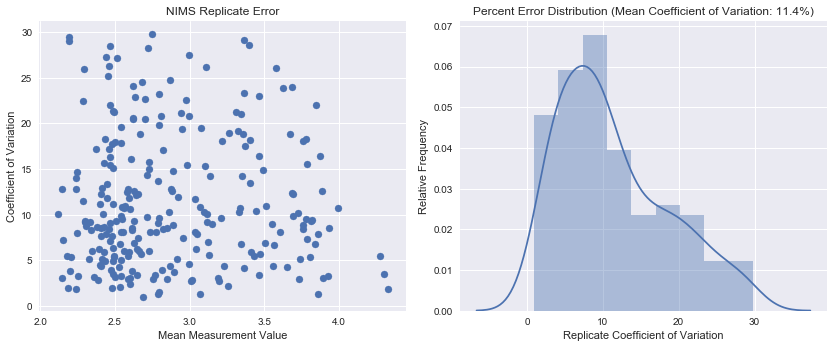

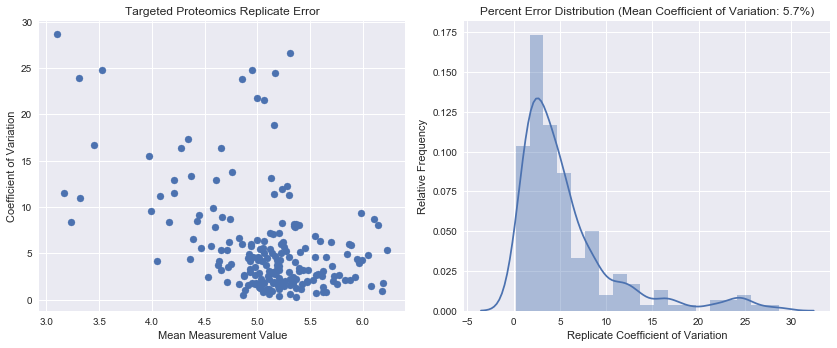

In [5]:
from plot import quality_plot
quality_plot(df,assay_types)

#### Batch Effect Analysis

In order to ensure that experimental measurement variations accurately represent the biology instead of the assay technique we conduct a series of batch to batch constistency checks. To do this we look for strains that had the same genotype and experimental conditions and were used in multiple batches. The Assays are plotted for that strain across the batches.